In [1]:
# Common imports
import numpy as np
import pandas as pd

In [2]:
# Read in training Data
training = pd.read_csv("train.csv")
training
# need to address missing ages.  Likely need to add a simple imputer later


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Saving figure attribute_histogram_plots


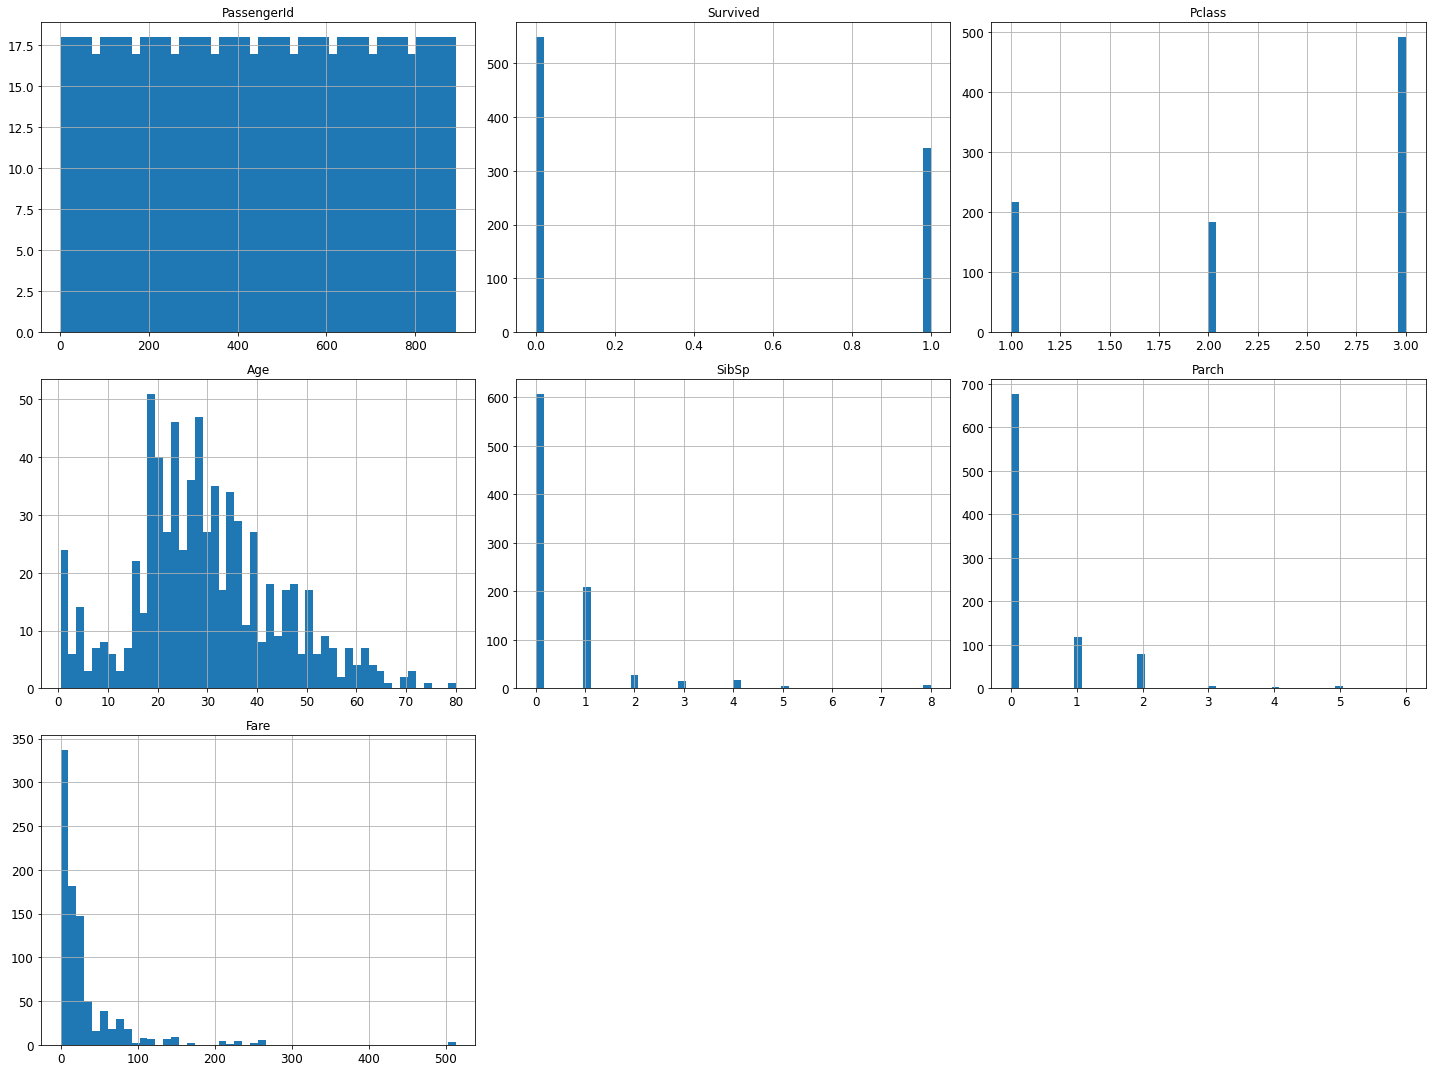

In [3]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import os

PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

# Function for saving images
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

training.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()  # matplotlib.pyplot command

In [4]:
# compute coorelation coefficient
corr_matrix = training.corr()
corr_matrix ['Survived'].sort_values(ascending = False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

Saving figure scatter_matrix_plot


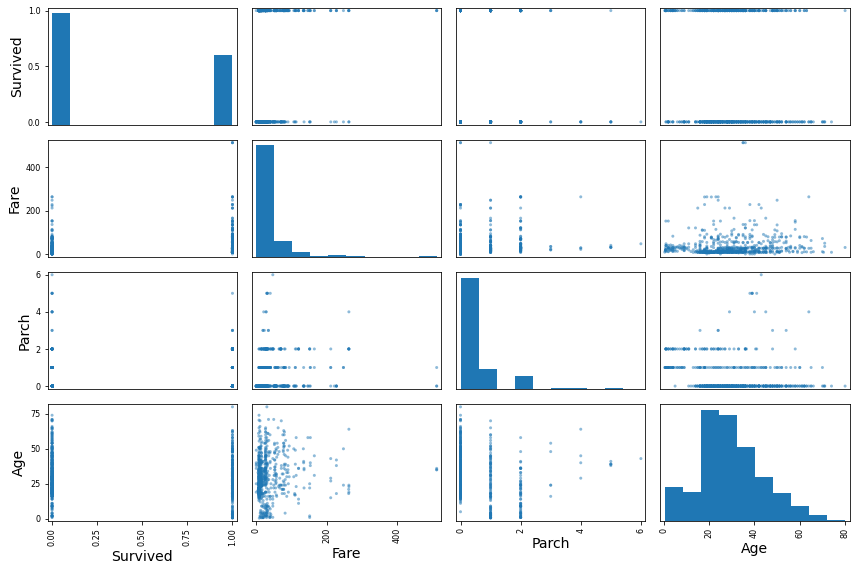

In [5]:
from pandas.plotting import scatter_matrix

attributes = ["Survived", "Fare", "Parch", "Age"]

scatter_matrix(training[attributes], figsize = (12,8))
save_fig("scatter_matrix_plot")

In [6]:
# DELETE LATER
training = pd.read_csv("train.csv")

In [7]:
#Use onehot encoder to covert sex male = 1 and female = 0
from sklearn.preprocessing import OneHotEncoder
sex = training [['Sex']]
cat_encoder = OneHotEncoder(drop = 'first', sparse = False)
sex_cat_1hot = cat_encoder.fit_transform(sex)
sex_cat = pd.DataFrame(sex_cat_1hot)
sex_cat = sex_cat.rename(columns={0:'Sex'})
sex_cat

,Sex
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
886,1.0
887,0.0
888,0.0
889,1.0


In [8]:
# add male / female onehot encorder data back into main dataframe
training = pd.merge(
    left = training,
    right = sex_cat,
    left_index = True,
    right_index = True,
)
# Create data frame dropping categorical data (name, ticket and embarked cabin (may be relavent later))
training_no_name = training.drop(['Name', 'Sex_x','Ticket', 'Embarked', 'Cabin'], axis = 1)
training_no_name = pd.DataFrame(training_no_name)
training_no_name

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_y
0,1,0,3,22.0,1,0,7.2500,1.0
1,2,1,1,38.0,1,0,71.2833,0.0
2,3,1,3,26.0,0,0,7.9250,0.0
3,4,1,1,35.0,1,0,53.1000,0.0
4,5,0,3,35.0,0,0,8.0500,1.0
...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1.0
887,888,1,1,19.0,0,0,30.0000,0.0
888,889,0,3,NaN,1,2,23.4500,0.0
889,890,1,1,26.0,0,0,30.0000,1.0


In [10]:
from sklearn.impute import SimpleImputer

median_age = training_no_name[['Age']]
imputer = SimpleImputer(strategy = 'median')
imputer.fit(median_age)
median_age = imputer.transform(median_age)
median_age = pd.DataFrame(median_age)

median_age = median_age.rename(columns={0 :'Age2'})

median_age

,Age2
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,28.0
889,26.0


In [17]:
training = pd.merge(
    left = training_no_name,
    right = median_age,
    left_index = True,
    right_index = True,
)
training = training.drop(['Age'], axis = 1)
training

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Sex_y,Age2
0,1,0,3,1,0,7.2500,1.0,22.0
1,2,1,1,1,0,71.2833,0.0,38.0
2,3,1,3,0,0,7.9250,0.0,26.0
3,4,1,1,1,0,53.1000,0.0,35.0
4,5,0,3,0,0,8.0500,1.0,35.0
...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,13.0000,1.0,27.0
887,888,1,1,0,0,30.0000,0.0,19.0
888,889,0,3,1,2,23.4500,0.0,28.0
889,890,1,1,0,0,30.0000,1.0,26.0


In [19]:
# Create 'response' from just the Survived column in orginal dataframe
response = training['Survived']
response = pd.DataFrame(response)

# Drop the Survived from 'Features' column to now just have X and Y
features = training.drop (['Survived'], axis = 1)


from sklearn.linear_model import LinearRegression
# Create "model" perform linear regression model fitting
model = LinearRegression()
model.fit(features, response)

print ("Model Coefficients: ", model.coef_)
print("Model Intercept : ", model.intercept_)


Model Coefficients:  [[ 1.02546010e-05 -1.70614354e-01 -4.34049291e-02 -1.92261568e-02
   4.11523051e-04 -5.12722128e-01 -5.84392837e-03]]
Model Intercept :  [1.29355638]
